# **COMPETENCIA SPACE TITANIC**

Este notebook recopila la informacion de un viaje interestelar a traves del espacio-tiempo, donde a traves de análisis de datos vamos a extraer información importante para predecir que personas sufrieron transportación a un dimension alterna.

Este Dataset es una Competencia de la pagina de [Kaggle](https://www.kaggle.com/competitions/spaceship-titanic/overview)

**Presentacion** 

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<img src="https://media.giphy.com/media/xT9IgusfDcqpPFzjdS/giphy.gif"></img>

# CARGA Y TRANSFORMACION DE DATOS

In [344]:
# IMPORT MANIPULATION DATA LIBRARY
import pandas as pd
import numpy as np

# IMPORT DATA VISUALIZATION LIBRARY
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# IMPORT MACHINE LEARNING LIBRARY
from sklearn.model_selection import train_test_split, GridSearchCV , cross_validate
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix ,f1_score, jaccard_score
from sklearn.impute import SimpleImputer

# OTHERS LIBRARYS
from pydotplus.graphviz import graph_from_dot_data
import warnings
warnings.simplefilter("ignore")

In [345]:
# LOAD DATASET
data = pd.read_csv("train.csv")
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [346]:
# TYPE
for i in data.columns:
    print(f'Column: {i} || Data Type : {data[i].dtype}')

Column: PassengerId || Data Type : object
Column: HomePlanet || Data Type : object
Column: CryoSleep || Data Type : object
Column: Cabin || Data Type : object
Column: Destination || Data Type : object
Column: Age || Data Type : float64
Column: VIP || Data Type : object
Column: RoomService || Data Type : float64
Column: FoodCourt || Data Type : float64
Column: ShoppingMall || Data Type : float64
Column: Spa || Data Type : float64
Column: VRDeck || Data Type : float64
Column: Name || Data Type : object
Column: Transported || Data Type : bool


In [347]:
# DUPLICATED
print(f' Dataset contain {data.duplicated().sum()} duplicated data')

 Dataset contain 0 duplicated data


In [348]:
# DATA SIZE
print(f'Dataset Size : {len(data)}')


Dataset Size : 8693


In [349]:
# NULLS
for i in data.columns:
    print(f'Column {i} contain {len(data[i]) - data[i].isnull().sum()} data \n'
            f'Null values represent {(data[i].isnull().sum()/len(data[i]))*100:.2f} % dataset \n')

Column PassengerId contain 8693 data 
Null values represent 0.00 % dataset 

Column HomePlanet contain 8492 data 
Null values represent 2.31 % dataset 

Column CryoSleep contain 8476 data 
Null values represent 2.50 % dataset 

Column Cabin contain 8494 data 
Null values represent 2.29 % dataset 

Column Destination contain 8511 data 
Null values represent 2.09 % dataset 

Column Age contain 8514 data 
Null values represent 2.06 % dataset 

Column VIP contain 8490 data 
Null values represent 2.34 % dataset 

Column RoomService contain 8512 data 
Null values represent 2.08 % dataset 

Column FoodCourt contain 8510 data 
Null values represent 2.11 % dataset 

Column ShoppingMall contain 8485 data 
Null values represent 2.39 % dataset 

Column Spa contain 8510 data 
Null values represent 2.11 % dataset 

Column VRDeck contain 8505 data 
Null values represent 2.16 % dataset 

Column Name contain 8493 data 
Null values represent 2.30 % dataset 

Column Transported contain 8693 data 
Null va

In [350]:
# DESCRIBE-STATISTICS-FLOAT COLUMNS
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [351]:
# VALUES OBJECT COLUMNS
for i in data.columns:
    if data[i].dtype == "object":
        print(f' Column: {i} values: {data[i].unique()} \n')

 Column: PassengerId values: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] 

 Column: HomePlanet values: ['Europa' 'Earth' 'Mars' nan] 

 Column: CryoSleep values: [False True nan] 

 Column: Cabin values: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

 Column: Destination values: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

 Column: VIP values: [False True nan] 

 Column: Name values: ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre'] 



In [352]:
data_clean = data

In [353]:
# CHANGE BOOLEAN VALUES
data_clean["CryoSleep"] = data_clean["CryoSleep"].map({True:1,False:0})
data_clean["VIP"] = data_clean["VIP"].map({True:1,False:0})
data_clean["Transported"] = data_clean["Transported"].map({True:1,False:0})

In [354]:
data_clean

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0.0,A/98/P,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1.0,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0.0,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0.0,E/608/S,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


# VISULIZATION DATA   

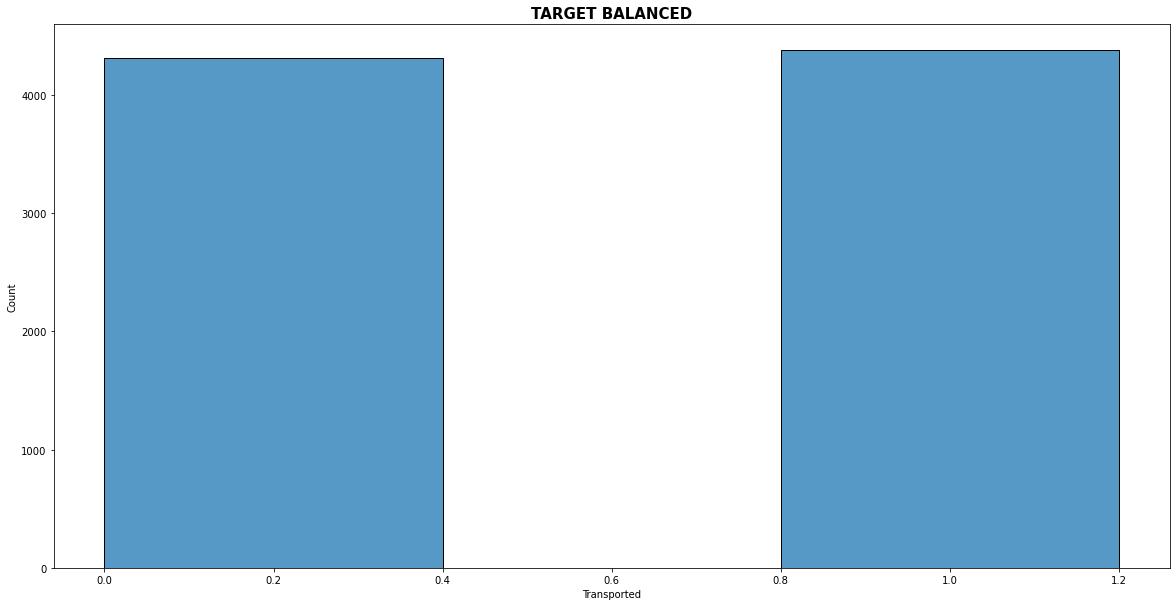

In [355]:
plt.figure(figsize=(20,10))
plt.title("TARGET BALANCED",fontsize = 15, fontweight = "bold")
sns.histplot(data_clean["Transported"],bins=2,binwidth=0.4)
plt.show()

##### OBSERVACION 
Podemos observar que el dataset contiene la columna transported que es aquella que contiene el target del modelo, podemos observar que esta balanceada, no vamos a tener problemas a la hora de poder predecir tanto los False o True


<img src="https://media.giphy.com/media/PxZqQHKP3VFbkZ0EDI/giphy.gif"></img>

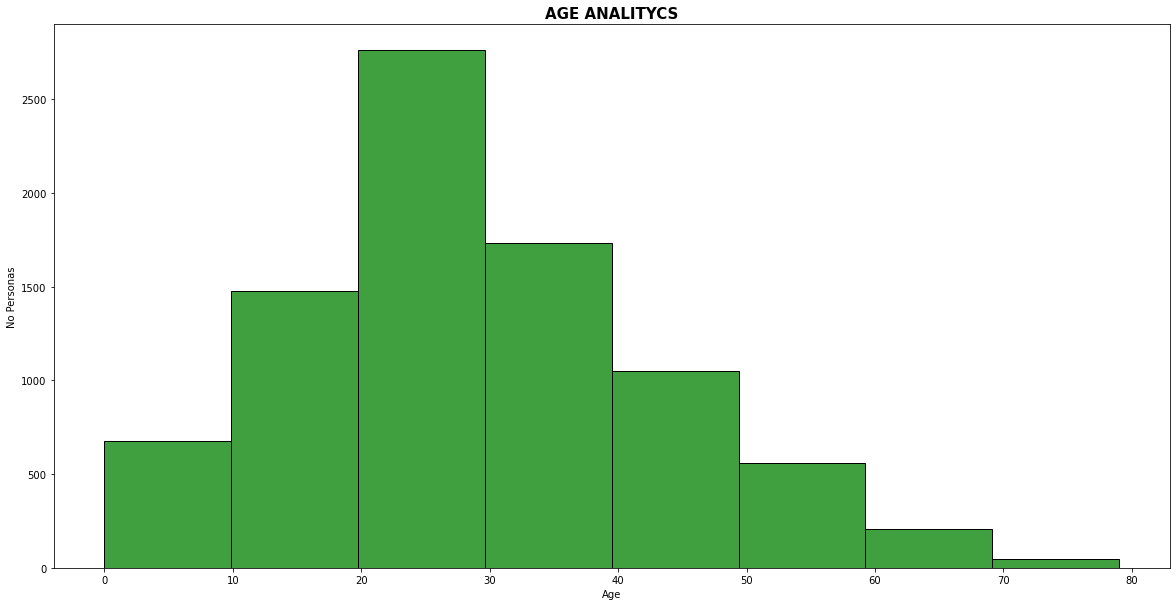

In [356]:
plt.figure(figsize=(20,10))
plt.title("AGE ANALITYCS",fontsize = 15, fontweight = "bold")
plt.ylabel("No Personas")
sns.histplot(data_clean,x="Age",bins=8,color="g")
plt.show()


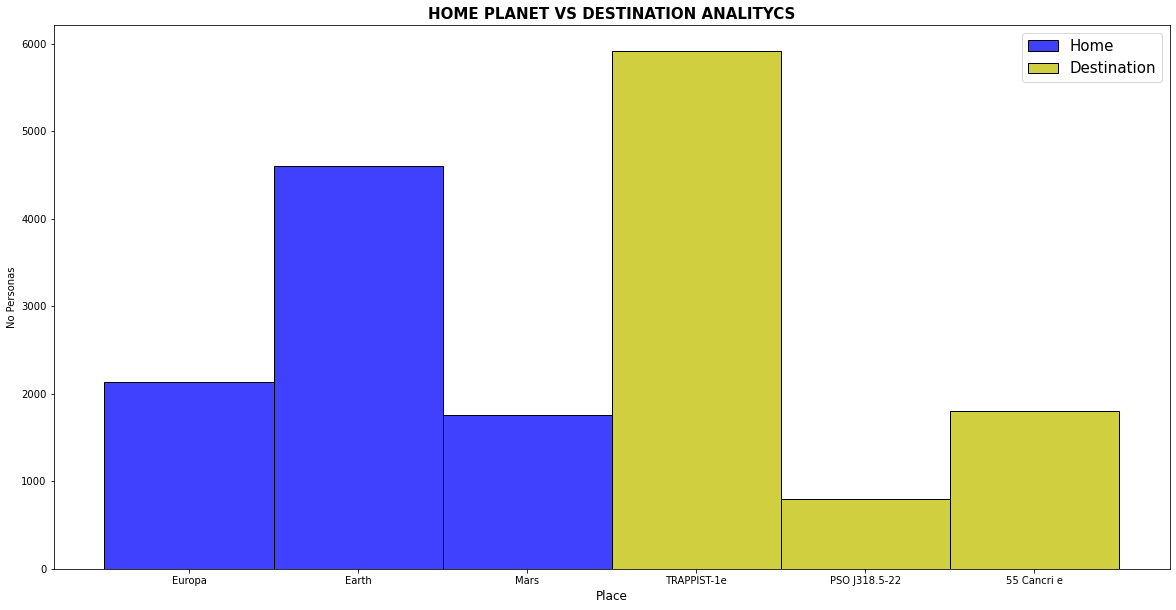

In [357]:
plt.figure(figsize=(20,10))
plt.title("HOME PLANET VS DESTINATION ANALITYCS",fontsize = 15, fontweight = "bold")
plt.ylabel("No Personas")
sns.histplot(data_clean,x="HomePlanet",bins=8,color="b")
sns.histplot(data_clean,x="Destination",color="y")
plt.xlabel("Place",fontsize=12)
plt.legend(["Home","Destination"],fontsize=15)
plt.show()

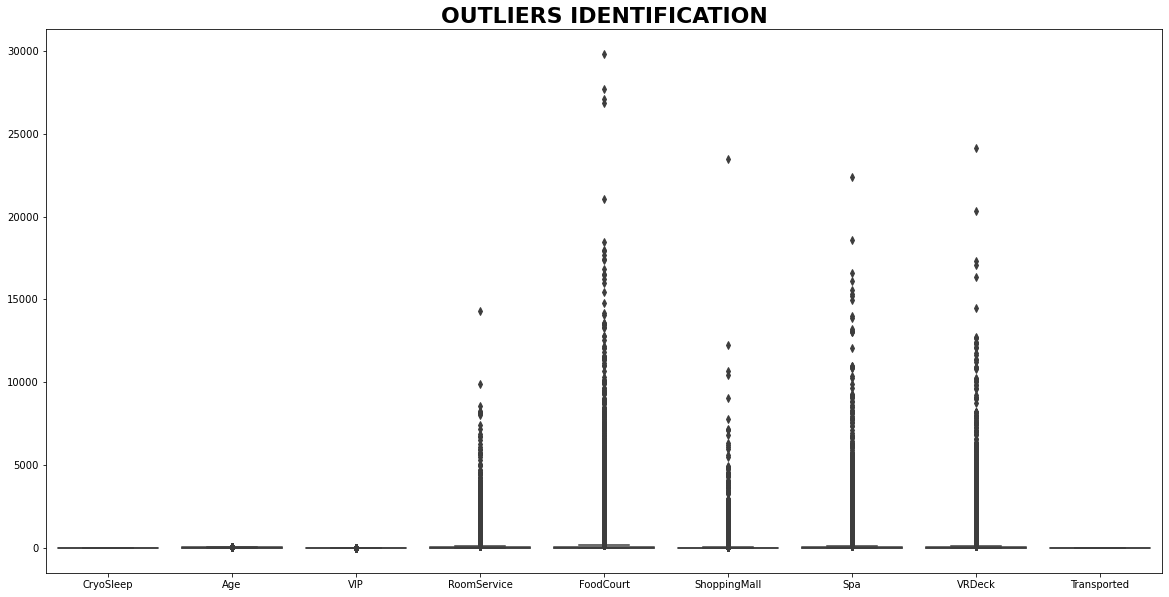

In [358]:
plt.figure(figsize=(20,10))
plt.title("OUTLIERS IDENTIFICATION", fontsize=22, fontweight="bold")
sns.boxplot(data=data_clean)
plt.show()

In [359]:
#DELETE OUTLIERS
#minimo = data_clean.quantile(0.25)
#maximo = data_clean.quantile(0.75)
#IQR = maximo - minimo

#new_data = data_clean[~((data_clean < (minimo - 1.5 * IQR)) | (data_clean > (maximo + 1.5 * IQR))).any(axis=1)]
#new_data.reset_index(inplace=True,drop=True)

In [360]:
new_data = data_clean

In [361]:
# DELETE COLUMNS UNNECESARY FOR MACHINE LEARNING
new_data.drop(columns=["Name","Cabin","PassengerId"],inplace=True)

In [362]:
# ENCODING VARIABLES
homeplanet_dummies = pd.get_dummies(new_data["HomePlanet"],prefix="Home")
destination_dummies = pd.get_dummies(new_data["Destination"],prefix="Destination")

In [363]:
new_data = new_data.join(homeplanet_dummies)
new_data = new_data.join(destination_dummies)
new_data.drop(columns=["Destination","HomePlanet"],inplace=True)

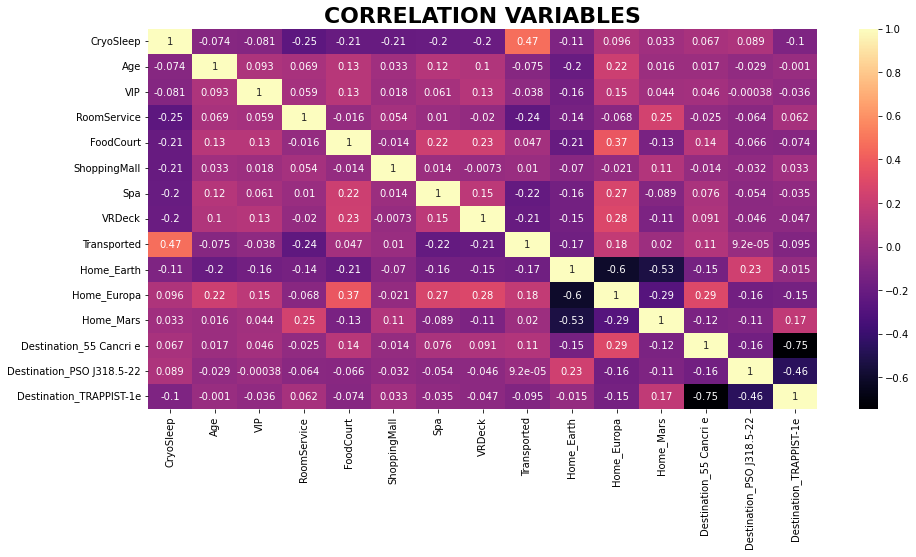

In [364]:
plt.figure(figsize=(15,7))
plt.title("CORRELATION VARIABLES", fontsize=22, fontweight="bold")
sns.heatmap(new_data.corr(),annot=True,cmap="magma")
plt.show()

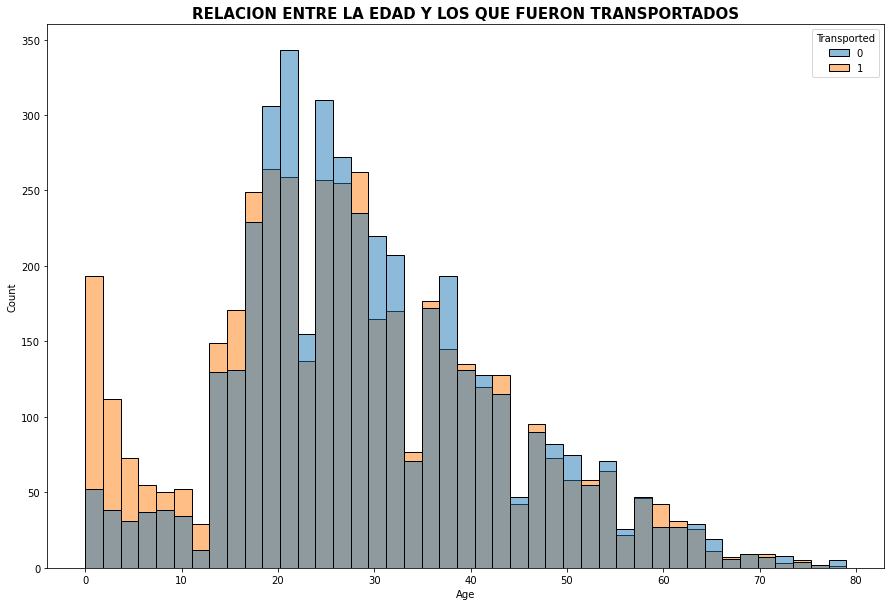

In [365]:
plt.figure(figsize=(15,10))
plt.title("RELACION ENTRE LA EDAD Y LOS QUE FUERON TRANSPORTADOS", fontsize= 15,fontweight= "bold")
sns.histplot(data=new_data,x="Age",hue="Transported")
plt.show()

In [366]:
new_data_columns = new_data.columns

In [367]:
# IMPUTAR DATOS VACIOS
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(new_data)
new_data = imputer.transform(new_data)
new_data = pd.DataFrame(new_data,columns=new_data_columns)

In [368]:
new_data.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Home_Earth                   0
Home_Europa                  0
Home_Mars                    0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [369]:
X = new_data.drop(columns="Transported")
y = new_data["Transported"]

# MODELO BENCHMARK

Realizamos el primer modelo de referencia con el fin de comparar los resultados con los proximos modelos mejorando los atributos

<img src="https://media.giphy.com/media/NsBknNwmmWE8WU1q2U/giphy.gif"></img>

## NORMALIZACION DE DATOS

In [370]:
scl = StandardScaler()
scl.fit(X)
data_model = scl.transform(X)
data_model = pd.DataFrame(data_model,columns=X.columns)
data_model.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Home_Earth,Home_Europa,Home_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,-0.75675,0.709437,-0.156767,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,-1.060617,1.754795,-0.503664,-0.511013,-0.317487,0.685313
1,-0.75675,-0.336717,-0.156767,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,0.942847,-0.569867,-0.503664,-0.511013,-0.317487,0.685313
2,-0.75675,2.034566,6.531425,-0.275409,1.955616,-0.290817,5.694289,-0.225782,-1.060617,1.754795,-0.503664,-0.511013,-0.317487,0.685313
3,-0.75675,0.290975,-0.156767,-0.340590,0.517406,0.330225,2.683471,-0.098708,-1.060617,1.754795,-0.503664,-0.511013,-0.317487,0.685313
4,-0.75675,-0.894666,-0.156767,0.118709,-0.243409,-0.038048,0.225732,-0.267258,0.942847,-0.569867,-0.503664,-0.511013,-0.317487,0.685313


## TREE DECISION

Seleccionamos como primer modelo simple TreeDecisionClassifier 

In [371]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X,y)
predict_train = tree.predict(X)

In [372]:
pd.crosstab(y,predict_train)

col_0,0.0,1.0
Transported,,
0.0,2974,1341
1.0,553,3825


In [373]:
f1_score(y,predict_train)

0.8015507124895223

In [374]:
f1_score(ytest,predict_test)

0.7875734676742233

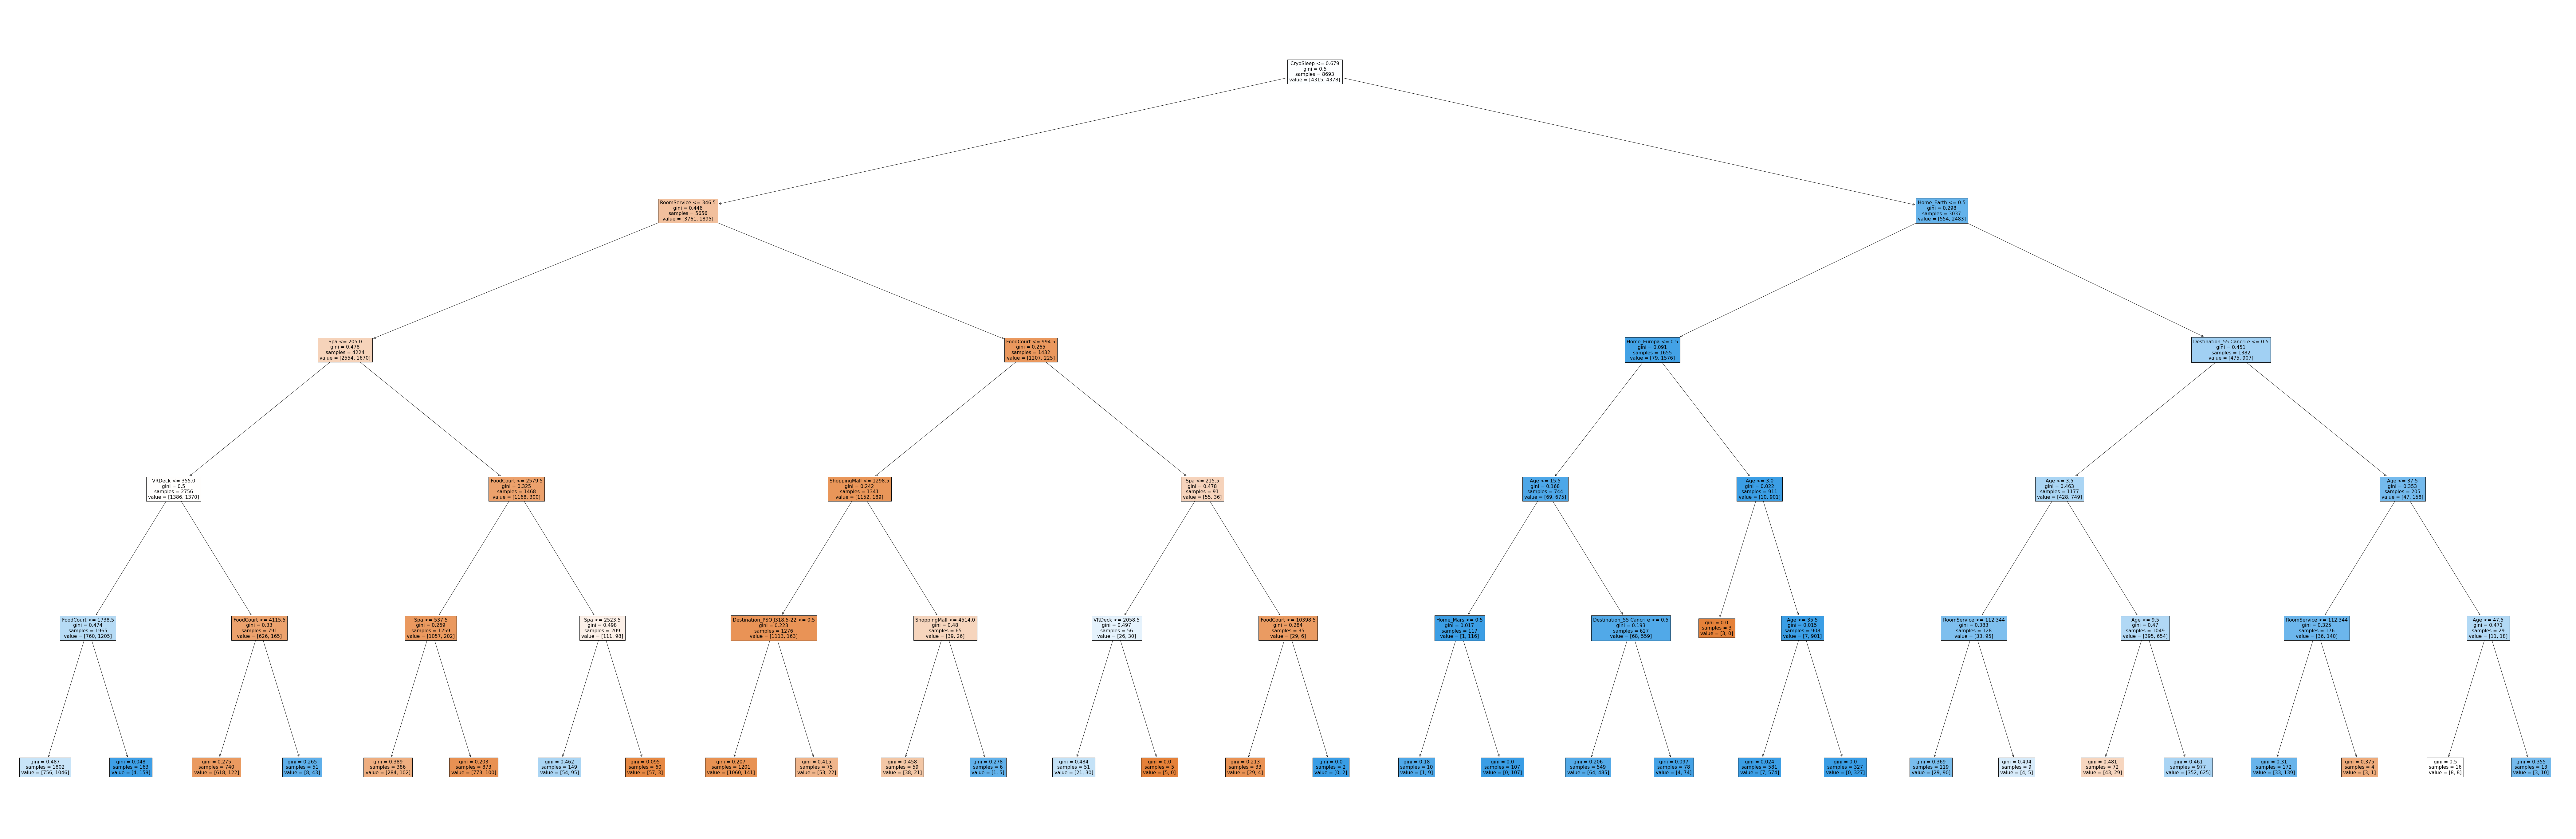

In [375]:
plt.figure(figsize=(150,50))
plot_tree(tree, feature_names=X.columns,filled=True);

In [376]:
parameters = {"criterion":["gini","entropy","log_loss"] ,
              "splitter":["best","random"],
              "max_depth": [1,5,10,15,30,50,100,1000]}

### TREE DECISION GRID SEARCH Y CROSS VALIDATION
Utilizamos la Clase Grid para encontrar los mejores parametros para implementar en los modelos

In [377]:
tree = DecisionTreeClassifier()

In [378]:
grid = GridSearchCV(tree,param_grid=parameters,cv=5)

In [379]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 15, 30, 50, 100, 1000],
                         'splitter': ['best', 'random']})

In [380]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

In [381]:
predict_train_grid = grid.predict(X)

In [382]:
pd.crosstab(y,predict_train_grid)

col_0,0.0,1.0
Transported,,
0.0,3351,964
1.0,600,3778


In [383]:
f1_score(y,predict_train_grid)

0.8285087719298245

# LINEAR SUPPORT VECTOR MACHINE

In [384]:
svm = LinearSVC()

In [385]:
svm_params = {"penalty":["l1","l2"],"loss":["hinge","squared_hinge"], "C":[1,5,10,15,20,30,100,1000]}

In [386]:
svm = GridSearchCV(svm,param_grid= svm_params, cv=5)

In [387]:
svm.fit(X,y)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 30, 100, 1000],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [388]:
svm.best_params_

{'C': 5, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [389]:
svm_train = svm.predict(X)

In [390]:
f1_score(y,svm_train)

0.732409194595543

# XGB CLASSIFIER

In [391]:
model_xgb = XGBClassifier()

In [392]:
xgb_parameters = {"gamma":[-100,-20,-10,0,0.1,0.3,1,10,20,40,100,1000],
                  "max_depth":[1,10,15,20,25]}

In [393]:
grid_xgb = GridSearchCV(model_xgb,param_grid=xgb_parameters,cv=5)

In [394]:
grid_xgb.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [395]:
grid_xgb.best_params_

{'gamma': 10, 'max_depth': 10}

In [396]:
xgb_predict = grid_xgb.predict(X)

In [397]:
f1_score(y,xgb_predict)

0.8204392451164331

# RANDOM FOREST

In [398]:
rf = RandomForestClassifier()

In [399]:
rf_parameters = {"n_estimators": [1,10,15,20,50],"max_depth":[1,10,15,20,50,100]}

In [400]:
grid_rf = GridSearchCV(rf,param_grid=rf_parameters,cv=5)

In [401]:
grid_rf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 15, 20, 50, 100],
                         'n_estimators': [1, 10, 15, 20, 50]})

In [402]:
grid_rf.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [403]:
rf_predit = grid_rf.predict(X)

In [404]:
accuracy_score(y,rf_predit)

0.8412515817324284

In [405]:
rf_predict_test = grid_rf.predict(X)

In [406]:
accuracy_score(y,rf_predict_test)

0.8412515817324284

In [407]:
pd.crosstab(y,rf_predit)

col_0,0.0,1.0
Transported,,
0.0,3526,789
1.0,591,3787


In [408]:
recall = 2201 / (2201+406)

In [409]:
print(recall) # Exhaustividad o Recall es la cantidad que el modelo es capaz de identificar

0.844265439202148


In [410]:
precision = 2201 / (2201+294) 

In [411]:
print(precision) # la precision es la calidad del modelo a la hora de clasificar

0.8821643286573146


In [412]:
f1_score(y,rf_predit) # Esta metrica es la media armonica entre el recall y la precision

0.8458789367880277

# MLP CLASSIFIER

In [413]:
mlp = MLPClassifier(hidden_layer_sizes= 50,max_iter=300)

In [414]:
#mlp_parameters = {"hidden_layer_sizes":[(100,),(130,),(190,),(259,)],
#                  "activation":["identify","logistic","tanh","relu"],
#                  "alpha":[0.0001,0.001,0.1,1,1.2],
#                  "learning_rate_init":[0.001,0.1,1,1.2,1.9,3.9]}

In [415]:
#grid_ml = GridSearchCV(mlp,param_grid=mlp_parameters,cv=5)

In [416]:
mlp.fit(X,y)

MLPClassifier(hidden_layer_sizes=50, max_iter=300)

In [417]:
mlp_predict = mlp.predict(X)

In [418]:
f1_score(y,mlp_predict)

0.7923497267759563

# SUBMISSION 
En esta parte del notebook generamos las predicciones sobre el dataset Test otorgado por Kaggle para subirlo en la pagina y obtener la clasificación del modelo desarrollado

<img src="https://media.giphy.com/media/fHeZi45eRonFGUush7/giphy.gif"></img>

In [419]:
test_b = pd.read_csv("test.csv")

In [420]:
test_b

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [421]:
test = test_b.drop(columns=["Name","Cabin", "PassengerId"])

In [422]:
homeplanet_dummies = pd.get_dummies(test["HomePlanet"],prefix="Home")
destination_dummies = pd.get_dummies(test["Destination"],prefix="Destination")

In [423]:
test = test.join(homeplanet_dummies)
test = test.join(destination_dummies)
test.drop(columns=["Destination","HomePlanet"],inplace=True)

In [424]:
test_columns = test.columns

In [425]:
imputer_f = SimpleImputer()
imputer_f.fit(test)
test = imputer_f.transform(test)
test = pd.DataFrame(test,columns=test_columns)

In [426]:
submission_predict = mlp.predict(test)

In [427]:
submission = pd.DataFrame(submission_predict,columns=["Binary"])

In [428]:
submission["PassengerId"] = test_b["PassengerId"]

In [429]:
submission["Transported"] = 0

In [430]:
for i in range(len(submission["Binary"])):
    if submission["Binary"][i] == 0:
        submission["Transported"][i] = "False"
    else:
        submission["Transported"][i] = "True"

In [431]:
submission.drop(columns="Binary",inplace=True)

In [432]:
submission.to_csv("Submission.csv",index=False)

In [433]:
len(submission)

4277